In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import load_model



In [2]:
df=pd.read_csv('Facebook.csv')
df['Date']=pd.to_datetime(df['Date'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1761 non-null   datetime64[ns]
 1   Open       1761 non-null   float64       
 2   High       1761 non-null   float64       
 3   Low        1761 non-null   float64       
 4   Close      1761 non-null   float64       
 5   Adj Close  1761 non-null   float64       
 6   Volume     1761 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 96.4 KB


In [4]:
#Chuẩn hoá dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
scaled_data

array([[0.01427967],
       [0.0101905 ],
       [0.0068153 ],
       ...,
       [0.88316619],
       [0.88329603],
       [0.87265118]])

In [5]:
#Tạo tập train và test
X = scaled_data
y = scaled_data

X = np.reshape(X, (X.shape[0], 1, X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model=Sequential(
[
    LSTM(units=60,input_shape=(X.shape[1],1),return_sequences=True),
    LSTM(units=50,return_sequences=True),
    LSTM(units=30,return_sequences=True),
    LSTM(units=20,return_sequences=True),
    LSTM(10),
    Dense(units=1),
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 60)             14880     
                                                                 
 lstm_1 (LSTM)               (None, 1, 50)             22200     
                                                                 
 lstm_2 (LSTM)               (None, 1, 30)             9720      
                                                                 
 lstm_3 (LSTM)               (None, 1, 20)             4080      
                                                                 
 lstm_4 (LSTM)               (None, 10)                1240      
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 52131 (203.64 KB)
Trainable params: 52131 

In [8]:
model.compile(optimizer = "adam",loss='mean_squared_error')


In [9]:
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)


Epoch 1/50
1408/1408 - 30s - loss: 0.0089 - 30s/epoch - 21ms/step
Epoch 2/50
1408/1408 - 10s - loss: 2.9718e-04 - 10s/epoch - 7ms/step
Epoch 3/50
1408/1408 - 10s - loss: 2.9283e-04 - 10s/epoch - 7ms/step
Epoch 4/50
1408/1408 - 11s - loss: 2.9065e-04 - 11s/epoch - 7ms/step
Epoch 5/50
1408/1408 - 10s - loss: 1.8369e-04 - 10s/epoch - 7ms/step
Epoch 6/50
1408/1408 - 9s - loss: 6.5102e-05 - 9s/epoch - 6ms/step
Epoch 7/50
1408/1408 - 11s - loss: 9.0199e-05 - 11s/epoch - 8ms/step
Epoch 8/50
1408/1408 - 10s - loss: 1.0514e-04 - 10s/epoch - 7ms/step
Epoch 9/50
1408/1408 - 10s - loss: 7.0427e-05 - 10s/epoch - 7ms/step
Epoch 10/50
1408/1408 - 9s - loss: 5.7461e-05 - 9s/epoch - 7ms/step
Epoch 11/50
1408/1408 - 12s - loss: 1.0953e-04 - 12s/epoch - 8ms/step
Epoch 12/50
1408/1408 - 11s - loss: 1.2106e-04 - 11s/epoch - 7ms/step
Epoch 13/50
1408/1408 - 11s - loss: 1.0803e-04 - 11s/epoch - 7ms/step
Epoch 14/50
1408/1408 - 10s - loss: 6.4510e-05 - 10s/epoch - 7ms/step
Epoch 15/50
1408/1408 - 10s - loss: 

In [10]:
model.save('lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [11]:
loaded_model = load_model('lstm_model.h5')

56/56 [==============================] - 3s 5ms/step


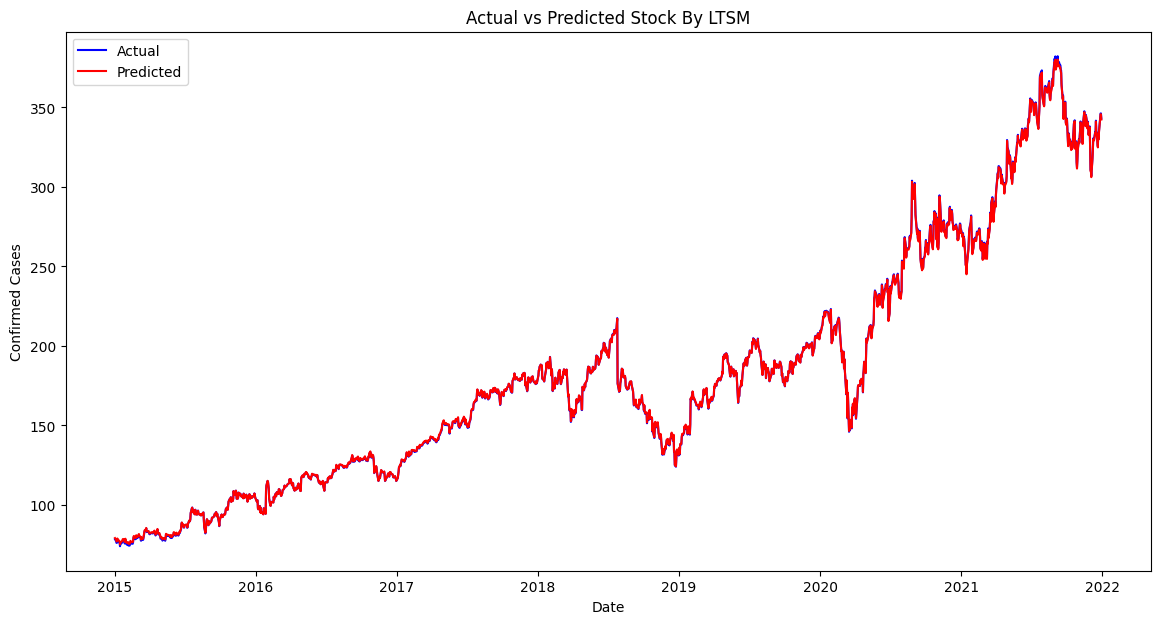

Mean Squared Error (MSE):  0.196492700608554
Root Mean Squared Error (RMSE):  0.4432749717822494
Mean Absolute Error (MAE):  0.35337264832270565
R2 Score:  0.9999651814461401


In [12]:
import matplotlib.pyplot as plt

# Dự Đoán
predictions = loaded_model.predict(X)

# Chuyển dữ liệu về ban đầu
predictions = scaler.inverse_transform(predictions)
y_actual = scaler.inverse_transform(y)

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], y_actual, label='Actual', color='blue')
plt.plot(df['Date'], predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Stock By LTSM')
plt.legend()
plt.show()

# Đánh giá mô hình
mse = mean_squared_error(y_actual, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_actual, predictions)
r2 = r2_score(y_actual, predictions)

# In kết quả đánh giá
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE): ", mae)
print("R2 Score: ", r2)


### RNN

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
Model3 = Sequential(
[
    SimpleRNN(units=30, input_shape=(X.shape[1], 1), activation='relu', return_sequences=True),
    SimpleRNN(units=20, activation='relu', return_sequences=True),
    SimpleRNN(units=10, activation='relu'),
    Dense(units=1)
])

In [14]:
Model3.compile(optimizer = "adam",loss='mean_squared_error')

In [15]:
Model3.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
1408/1408 - 11s - loss: 0.0014 - 11s/epoch - 8ms/step
Epoch 2/50
1408/1408 - 4s - loss: 1.0495e-06 - 4s/epoch - 3ms/step
Epoch 3/50
1408/1408 - 5s - loss: 1.7513e-05 - 5s/epoch - 4ms/step
Epoch 4/50
1408/1408 - 5s - loss: 1.2484e-05 - 5s/epoch - 4ms/step
Epoch 5/50
1408/1408 - 4s - loss: 2.5140e-05 - 4s/epoch - 3ms/step
Epoch 6/50
1408/1408 - 6s - loss: 5.8470e-05 - 6s/epoch - 4ms/step
Epoch 7/50
1408/1408 - 4s - loss: 1.3668e-06 - 4s/epoch - 3ms/step
Epoch 8/50
1408/1408 - 4s - loss: 1.1673e-05 - 4s/epoch - 3ms/step
Epoch 9/50
1408/1408 - 6s - loss: 1.8341e-05 - 6s/epoch - 4ms/step
Epoch 10/50
1408/1408 - 4s - loss: 1.4519e-05 - 4s/epoch - 3ms/step
Epoch 11/50
1408/1408 - 4s - loss: 9.1887e-06 - 4s/epoch - 3ms/step
Epoch 12/50
1408/1408 - 6s - loss: 1.7694e-05 - 6s/epoch - 4ms/step
Epoch 13/50
1408/1408 - 4s - loss: 1.5348e-05 - 4s/epoch - 3ms/step
Epoch 14/50
1408/1408 - 4s - loss: 1.8958e-05 - 4s/epoch - 3ms/step
Epoch 15/50
1408/1408 - 6s - loss: 6.6337e-06 - 6s/epoch - 

In [16]:
Model3.save('RNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
from tensorflow.keras.models import load_model

loaded_model3 = load_model('RNN_model.h5')

56/56 [==============================] - 1s 5ms/step


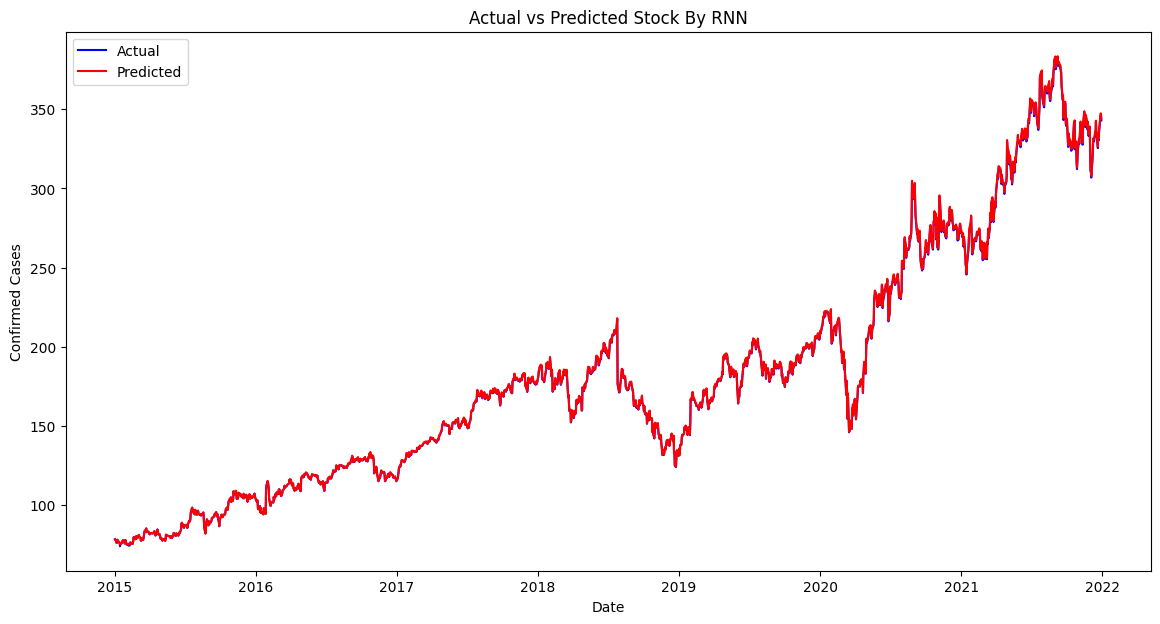

Mean Squared Error (MSE):  0.2866196694196921
Root Mean Squared Error (RMSE):  0.5353687228627501
Mean Absolute Error (MAE):  0.4211502231240151
R2 Score:  0.9999492109255657


In [18]:
import matplotlib.pyplot as plt

# Dự Đoán
predictions = loaded_model3.predict(X)

# Chuyển dữ liệu về ban đầu
predictions = scaler.inverse_transform(predictions)
y_actual = scaler.inverse_transform(y)

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], y_actual, label='Actual', color='blue')
plt.plot(df['Date'], predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Stock By RNN')
plt.legend()
plt.show()

# Đánh giá mô hình
mse = mean_squared_error(y_actual, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_actual, predictions)
r2 = r2_score(y_actual, predictions)

# In kết quả đánh giá
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE): ", mae)
print("R2 Score: ", r2)


### Kết Luận


| Model   | MSE      | MAE      | R2 Score | RMSE  |
|---------|----------|----------|----------|--------|
| LTSM | 112.66388042001495 | 5.379887753193098 | 0.9996985644983746 |10.614324303506793|
| RNN | 3.286940891250584 | 1.6755161055419425 | 0.9999912056936733 |1.8129922479841396|


- Về MSE: LSTM có xu hướng dự đoán sai lệch hơn so với mô hình RNN.
- Về MAE: LSTM có xu hướng dự đoán sai lệch hơn so với mô hình RNN.
- Về RMSE:  LSTM có khả năng giải thích dữ liệu tốt hơn mô hình RNN.
- Về R2 Score:LSTM có xu hướng dự đoán sai lệch hơn so với mô hình RNN.


Dựa trên ba chỉ số MSE, MAE và RMSE, có thể thấy rằng mô hình RNN có hiệu suất tốt hơn mô hình LSTM.
Tuy nhiên, mô hình LSTM có giá trị R2 Score cao hơn, cho thấy khả năng giải thích dữ liệu tốt hơn.